In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


file1='Fit2_Results_Ishara.csv'
file2='Fit2_Results_Zulkaida.txt'
file3='Fit2_Results_Nathan.txt'
file4='LocalFit2Results_iminuit_Ishara.csv'
file5='Fit2_Results_Liliet.txt'
file6='Fit2_Results_Andrew.csv'
file7='Fit2_Results_Nathan_7_9_21.csv'
file8='Fit2_Results_Ishara_NNFit.txt'

In [4]:
def FileData(filename,CFF,dCFF,clr,lbl,shift):
    tempdf=pd.read_csv(filename)
    #tempSet=np.array(tempdf["#Set"])+shift
    tempCFF=tempdf[CFF]
    temp_dCFF=tempdf[dCFF]
    templen=len(tempCFF)
    tempSet=[x+shift for x in range(templen)]
    plt.errorbar(tempSet,tempCFF,temp_dCFF,fmt='o',color=clr,label=lbl)
    #print(templen)

def FileData_SetShifted(filename,CFF,dCFF,clr,lbl,shift):
    tempdf=pd.read_csv(filename)
    #tempSet=np.array(tempdf["#Set"])+shift
    tempCFF=tempdf[CFF]
    temp_dCFF=tempdf[dCFF]
    templen=len(tempCFF)
    tempSet=[x-1+shift for x in range(templen)]
    plt.errorbar(tempSet,tempCFF,temp_dCFF,fmt='o',color=clr,label=lbl)
    
    
def FileDataTxt_S(filename,CFF,dCFF,clr,lbl,shift):
    tempdf=pd.read_csv(filename,sep='\s+')
    #tempdf=pd.read_csv(filename,sep=',')
    tempCFF=tempdf[CFF]
    temp_dCFF=tempdf[dCFF]
    templen=len(tempCFF)
    tempSet=[x+shift for x in range(templen)]
    plt.errorbar(tempSet,tempCFF,temp_dCFF,fmt='o',color=clr,label=lbl)
    #print(tempdf)
    
    
def FileDataTxt_C(filename,CFF,dCFF,clr,lbl,shift):
    #tempdf=pd.read_csv(filename,sep='\s+')
    tempdf=pd.read_csv(filename,sep=',')
    tempCFF=tempdf[CFF]
    temp_dCFF=tempdf[dCFF]
    templen=len(tempCFF)
    tempSet=[x+shift for x in range(templen)]
    plt.errorbar(tempSet,tempCFF,temp_dCFF,fmt='o',color=clr,label=lbl)
    #print(tempdf)    

def FileDataTxt_C_true(filename,CFF,clr,lbl,shift):
    tempdf=pd.read_csv(filename,sep=',')
    tempdfselect=tempdf[tempdf["index"]==0]
    #print(tempdfselect)
    tempCFF=tempdfselect[CFF]
    templen=len(tempCFF)
    tempSet=[x+shift for x in range(templen)]
    tempXerr=[0.45+0*x for x in range(templen)]
    #plt.plot(tempSet,tempCFF,'*',color=clr,label=lbl)
    plt.errorbar(tempSet,tempCFF,xerr=tempXerr,fmt='*',color=clr,label=lbl)

    
def FileDataCSV_Rep(filename,CFF,clr,lbl,shift):
    tempdf=pd.read_csv(filename,sep=',')
    tempsets=[]
    tempCFFs=[]
    tempCFFsErr=[]
    tempdfselectSet=tempdf[tempdf["set"]==0]
    tempCFFarray=tempdfselectSet[CFF]
    for i in range(len(tempCFFarray)):
        tempsets.append(i+shift)
        tempdfselectSet=tempdf[tempdf["set"]==i]
        tempCFFarray=tempdfselectSet[CFF]
        tempCFFs.append(np.mean(tempCFFarray))
        tempCFFsErr.append(np.std(tempCFFarray))
    #print(len(tempsets),len(tempCFFs),len(tempCFFsErr))
    plt.errorbar(tempsets,tempCFFs,tempCFFsErr,fmt='o',color=clr,label=lbl)
    

#FileDataTxt_C_true(file5,"ReH","red","Liliet",0.4)
#FileDataTxt(file3,"ReH","sigmaReH",'blue','Ishara',0)
#FileDataCSV_Rep(file6,"ReH",'blue','Ishara',0)

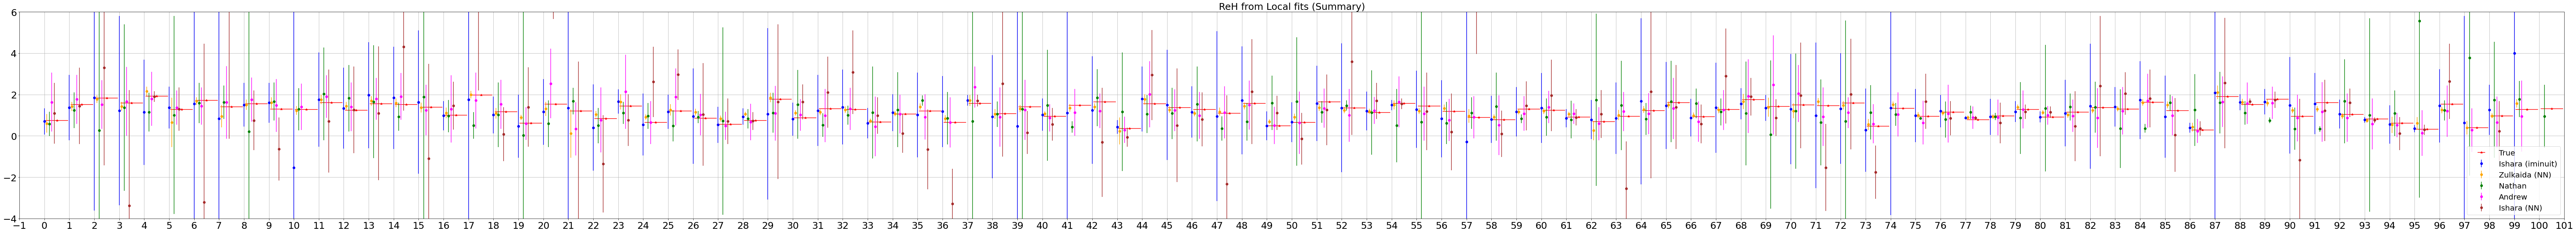

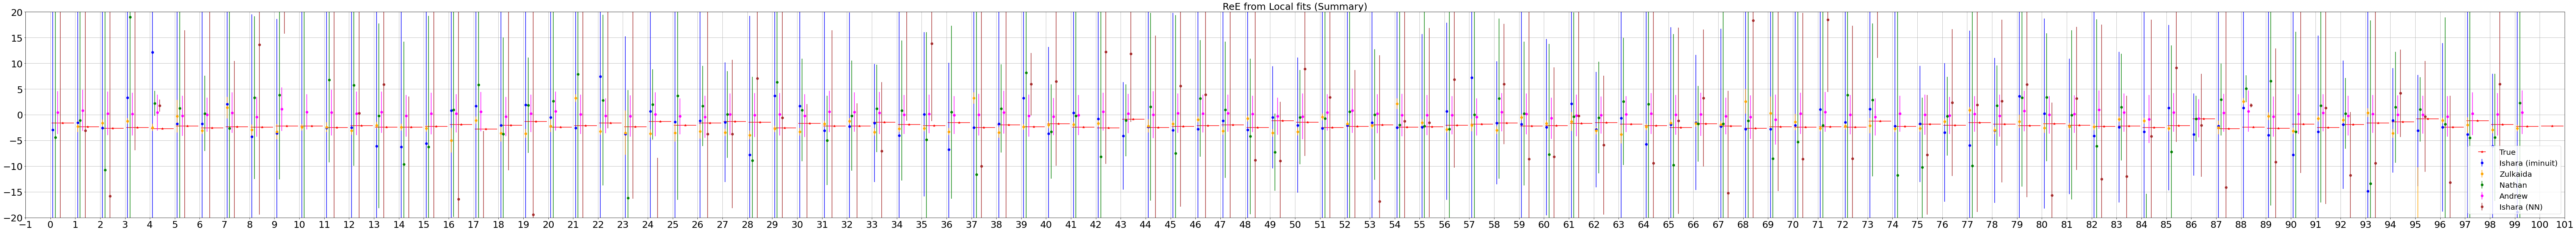

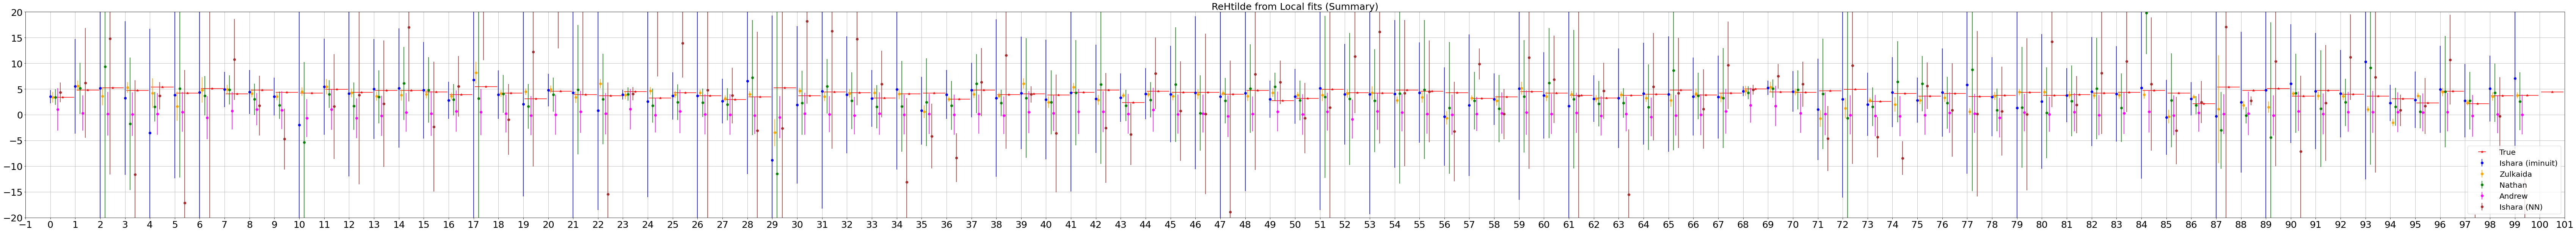

In [5]:
xmin=-1
xmax=101

f1=plt.figure(1,figsize=(120,10))
plt.title("ReH from Local fits (Summary)",fontsize=25)
#FileData(file1,"ReH","sigmaReH",'blue','Ishara (Curvefit)',0)
FileDataTxt_C_true(file5,"ReH","red","True",0.5)
FileData(file4,"ReH","sigmaReH",'blue','Ishara (iminuit)',0.0)
FileDataTxt_S(file2,"ReH","sigmaReH",'orange','Zulkaida (NN)',0.1)
#FileDataTxt_C(file3,"ReH","sigmaReH",'green','Nathan',0.2)
FileData(file7,"ReH","sigmaReH",'green','Nathan',0.2)
FileDataCSV_Rep(file6,"ReH",'magenta','Andrew',0.3)
FileDataTxt_S(file8,"ReH","sigmaReH",'brown','Ishara (NN)',0.4)
plt.xlim(-1,101)
plt.ylim(-4,6)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=4,fontsize=20,handlelength=3)
plt.xticks(np.arange(xmin,xmax+1, 1.0))
plt.grid('True')


f2=plt.figure(2,figsize=(120,10))
plt.title("ReE from Local fits (Summary)",fontsize=25)
#FileData(file1,"ReE","sigmaReE",'blue','Ishara (Curvefit)',0)
FileDataTxt_C_true(file5,"ReE","red","True",0.5)
FileData(file4,"ReE","sigmaReE",'blue','Ishara (iminuit)',0.1)
FileDataTxt_S(file2,"ReE","sigmaReE",'orange','Zulkaida',0.1)
FileDataTxt_C(file3,"ReE","sigmaReE",'green','Nathan',0.2)
FileDataCSV_Rep(file6,"ReE",'magenta','Andrew',0.3)
FileDataTxt_S(file8,"ReE","sigmaReE",'brown','Ishara (NN)',0.4)
plt.xlim(-1,101)
plt.ylim(-20,20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=4,fontsize=20,handlelength=3)
plt.xticks(np.arange(xmin,xmax+1, 1.0))
plt.grid('True')
#plt.grid(color='grey', linestyle='-', linewidth=0.05)


f3=plt.figure(3,figsize=(120,10))
plt.title("ReHtilde from Local fits (Summary)",fontsize=25)
#FileData(file1,"ReHtilde","sigmaReHtilde",'blue','Ishara (Curvefit)',0)
FileDataTxt_C_true(file5,"ReHtilde","red","True",0.5)
FileData(file4,"ReHtilde","sigmaReHtilde",'blue','Ishara (iminuit)',0.0)
FileDataTxt_S(file2,"ReHtilde","sigmaReHtilde",'orange','Zulkaida',0.1)
FileDataTxt_C(file3,"ReHtilde","sigmaReHtilde",'green','Nathan',0.2)
FileDataCSV_Rep(file6,"ReHT",'magenta','Andrew',0.3)
FileDataTxt_S(file8,"ReHtilde","sigmaReHtilde",'brown','Ishara (NN)',0.4)
plt.xlim(-1,101)
plt.ylim(-20,20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=4,fontsize=20,handlelength=3)
plt.xticks(np.arange(xmin,xmax+1, 1.0))
plt.grid('True')


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("SummaryPlot.pdf")
for fig in range(1,4):
    pdf.savefig(fig)
pdf.close()

